In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-47.40633396735463 -175.4698281995695
86.23262377303755 114.2697836328079
16.28960601634411 -120.64387270183971
62.450149264684114 174.10879348067124
78.07812455680431 41.290640665282154
53.45593232911378 35.02852928270829
75.95315740544515 -28.54323423971516
71.5875358329595 123.03759159100605
-10.048604242119865 -5.2245315564425425
-65.14368059626875 81.48183706077924
-17.478942090244246 149.46722160353988
59.446522860716584 -147.3930836173148
27.78840831232624 -21.20749014258601
11.026537107180602 24.80715510414194
14.902550089059986 -31.328714341225776
-70.34366392378993 103.0475984759662
22.644238561910612 -130.39590841475757
22.261040992449452 16.05285469304016
-24.589143646027935 -134.04451165435134
10.739744215772063 -163.6881676193235
6.389857408082676 -15.039718550924135
-49.19930714060554 74.02231051043984
-71.39972934833575 -163.03552202855226
62.070926576302355 78.63780029790206
41.11621064217451 -16.270085319077964
60.52922671113777 35.43580410142232
1.6090056456353636 -9

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=380381e2b26896999f1b2e8ebae9cdfc


In [19]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | ostrovnoy
Processing Record 6 of Set 1 | khvastovichi
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | zhigansk
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | bowen
Processing Record 12 of Set 1 | palmer
Processing Record 13 of Set 1 | los llanos de aridane
Processing Record 14 of Set 1 | birao
Processing Record 15 of Set 1 | porto novo
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | marzuq
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | makakilo city
Processing Record 21 of Set 1 | goderich
Processing Record 22 of Set 1 | souillac

Processing Record 39 of Set 4 | xiongyue
Processing Record 40 of Set 4 | ayagoz
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | upington
Processing Record 43 of Set 4 | rapid city
Processing Record 44 of Set 4 | syracuse
Processing Record 45 of Set 4 | te anau
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 48 of Set 4 | cape canaveral
Processing Record 49 of Set 4 | juneau
Processing Record 50 of Set 4 | katsuura
Processing Record 1 of Set 5 | milingimbi
City not found. Skipping...
Processing Record 2 of Set 5 | bayangol
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | waipawa
Processing Record 5 of Set 5 | teguise
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | caiaponia
Processing Record 9 of Set 5 | akhisar
Processing Record 10 of Set 5 | hvammstangi
City not fou

Processing Record 27 of Set 8 | fortuna
Processing Record 28 of Set 8 | tilichiki
Processing Record 29 of Set 8 | mahanoro
Processing Record 30 of Set 8 | vizinga
Processing Record 31 of Set 8 | nouadhibou
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | ulaanbaatar
Processing Record 34 of Set 8 | aklavik
Processing Record 35 of Set 8 | saint-ambroise
Processing Record 36 of Set 8 | port lincoln
Processing Record 37 of Set 8 | ulaangom
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | campo verde
Processing Record 40 of Set 8 | butaritari
Processing Record 41 of Set 8 | andenes
Processing Record 42 of Set 8 | khuzhir
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | totness
Processing Record 45 of Set 8 | grand centre
City not found. Skipping...
Processing Record 46 of Set 8 | bellevue
Processing Record 47 of Set 8 | moerai
Processing Record 48 of Set 8 | wahpeton
Processing Record 49 of Set 8 | kamaishi
Processi

Processing Record 11 of Set 12 | umm kaddadah
Processing Record 12 of Set 12 | riposto
Processing Record 13 of Set 12 | dali
Processing Record 14 of Set 12 | kissamos
Processing Record 15 of Set 12 | iquique
Processing Record 16 of Set 12 | inongo
Processing Record 17 of Set 12 | yining
Processing Record 18 of Set 12 | ganassi
Processing Record 19 of Set 12 | longyearbyen
Processing Record 20 of Set 12 | saurimo
Processing Record 21 of Set 12 | crab hill
City not found. Skipping...
Processing Record 22 of Set 12 | cairns
Processing Record 23 of Set 12 | lekoni
Processing Record 24 of Set 12 | lorengau
Processing Record 25 of Set 12 | shubarkuduk
Processing Record 26 of Set 12 | boa vista
Processing Record 27 of Set 12 | verkhnyaya maksakovka
Processing Record 28 of Set 12 | puerto del rosario
Processing Record 29 of Set 12 | mumford
Processing Record 30 of Set 12 | hanna
Processing Record 31 of Set 12 | znamenskoye
Processing Record 32 of Set 12 | taraz
Processing Record 33 of Set 12 |

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,78.80,84,100,18.77,TO,2022-12-09 23:08:28
1,Saskylakh,71.9167,114.0833,-15.86,98,100,4.70,RU,2022-12-09 23:08:28
2,Constitucion,-35.3333,-72.4167,64.29,79,41,14.56,CL,2022-12-09 23:08:25
3,Anadyr,64.7500,177.4833,6.49,71,0,11.18,RU,2022-12-09 23:08:29
4,Ostrovnoy,68.0531,39.5131,19.99,88,100,20.71,RU,2022-12-09 23:08:29
5,Khvastovichi,53.4694,35.0941,30.33,99,100,1.97,RU,2022-12-09 23:08:29
6,Zhigansk,66.7697,123.3711,-22.83,96,100,8.05,RU,2022-12-09 23:08:30
7,Jamestown,42.0970,-79.2353,32.02,60,0,9.22,US,2022-12-09 23:07:37
8,Busselton,-33.6500,115.3333,58.53,60,50,6.89,AU,2022-12-09 23:08:30
9,Bowen,-20.0167,148.2333,81.32,69,100,6.51,AU,2022-12-09 23:08:30


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-12-09 23:08:28,-21.2000,-175.2000,78.80,84,100,18.77
1,Saskylakh,RU,2022-12-09 23:08:28,71.9167,114.0833,-15.86,98,100,4.70
2,Constitucion,CL,2022-12-09 23:08:25,-35.3333,-72.4167,64.29,79,41,14.56
3,Anadyr,RU,2022-12-09 23:08:29,64.7500,177.4833,6.49,71,0,11.18
4,Ostrovnoy,RU,2022-12-09 23:08:29,68.0531,39.5131,19.99,88,100,20.71
5,Khvastovichi,RU,2022-12-09 23:08:29,53.4694,35.0941,30.33,99,100,1.97
6,Zhigansk,RU,2022-12-09 23:08:30,66.7697,123.3711,-22.83,96,100,8.05
7,Jamestown,US,2022-12-09 23:07:37,42.0970,-79.2353,32.02,60,0,9.22
8,Busselton,AU,2022-12-09 23:08:30,-33.6500,115.3333,58.53,60,50,6.89
9,Bowen,AU,2022-12-09 23:08:30,-20.0167,148.2333,81.32,69,100,6.51


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

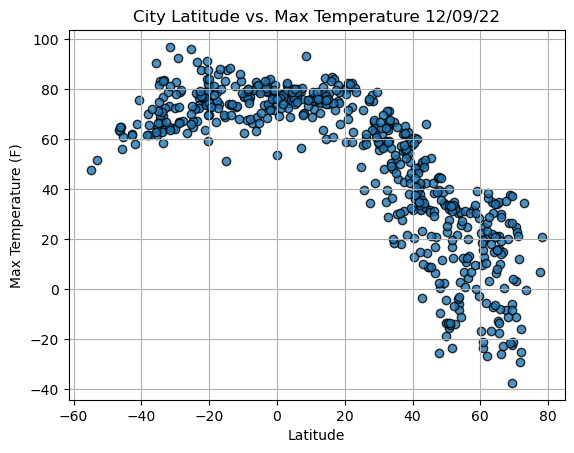

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

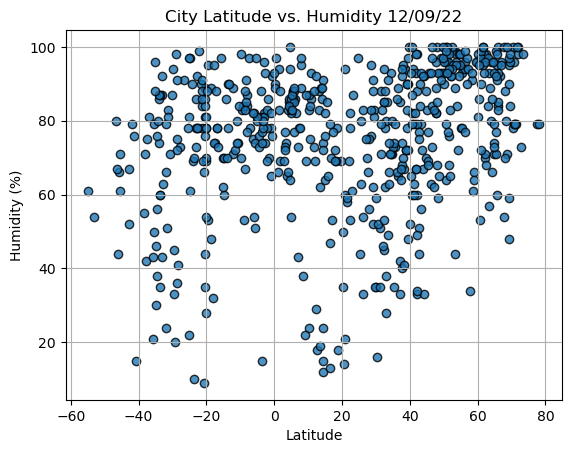

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

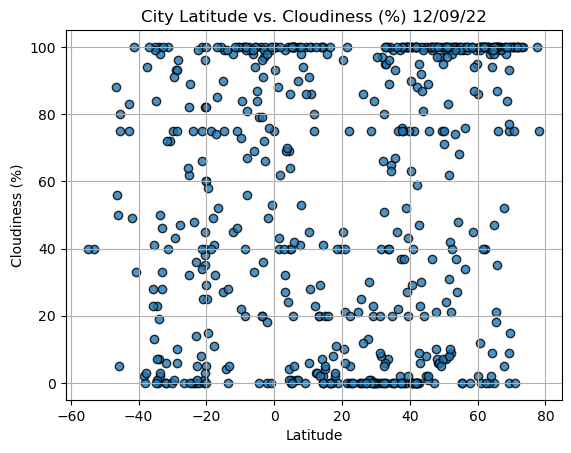

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

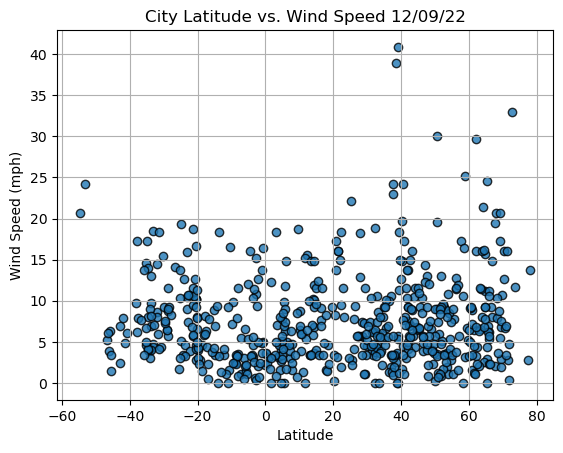

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()